In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
color_pal = sns.color_palette()

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


In [328]:
#Loading plant 1 dataset

In [28]:
# load the data, set index and convert to datetime 
plant = pd.read_csv(r"/home/kasun/Documents/Working_folder/data/Plant_1_Generation_Data.csv")
plant = plant.set_index('DATE_TIME')
plant.index = pd.to_datetime(plant.index)

In [29]:
weather = pd.read_csv(r"/home/kasun/Documents/Working_folder/data/Plant_1_Weather_Sensor_Data.csv")
weather = weather.set_index('DATE_TIME')
weather.index = pd.to_datetime(weather.index)

###  Preliminary analysis on datasets

In [30]:
plant.head(25)

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
2020-05-15 00:00:00,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
2020-05-15 00:00:00,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
2020-05-15 00:00:00,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
2020-05-15 00:00:00,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0


In [31]:
plant.shape

(68778, 6)

In [32]:
plant.dtypes

PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object

In [33]:
plant.groupby('DATE_TIME').count().head(5)

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-01-06 00:00:00,22,22,22,22,22,22
2020-01-06 00:15:00,22,22,22,22,22,22
2020-01-06 00:30:00,22,22,22,22,22,22
2020-01-06 00:45:00,22,22,22,22,22,22
2020-01-06 01:00:00,22,22,22,22,22,22


In [34]:
inverters = plant[plant.duplicated('SOURCE_KEY',keep=False)]['SOURCE_KEY'].unique()

In [35]:
inverters

array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
       'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
       'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
       'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
       'YxYtjZvoooNbGkE'], dtype=object)

In [36]:
len(inverters)

22

there are 22 unique inverters. 


In [87]:
plant.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [37]:
weather.head()

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,
2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [38]:
weather.dtypes

PLANT_ID                 int64
SOURCE_KEY              object
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object

In [39]:
weather.isnull().sum()

PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [85]:
weather.shape

(3182, 5)

In [86]:
weather.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


### Generate visualizations on given data

preform a groupby on plant data to sum up the all the sensor data for 15min interval time 

In [102]:
inverter = plant.groupby('SOURCE_KEY').sum()

# Rearrange data in ascending order based on a specific column
inverter = inverter.sort_values(by='DC_POWER', ascending=False).copy()


In [103]:
inverter.shape

(22, 5)

In [104]:
inverter.head()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
SOURCE_KEY,,,,,
adLQvlD726eNBSB,12897068119,1.019778e+07,997125.156663,1.060362e+07,1.996925e+10
1IF53ai7Xc0U56Y,12897068119,1.006294e+07,984007.153452,1.047012e+07,1.969052e+10
VHMLBKoKgIrUVDU,12954958133,1.005725e+07,983449.000642,1.067493e+07,2.298201e+10
3PZuoBAID5Wc2HD,12892933118,1.004313e+07,982068.208928,1.046668e+07,2.219085e+10
McdE0feGgRqW7Ca,12917743124,1.003212e+07,981080.708217,1.037773e+07,2.276640e+10


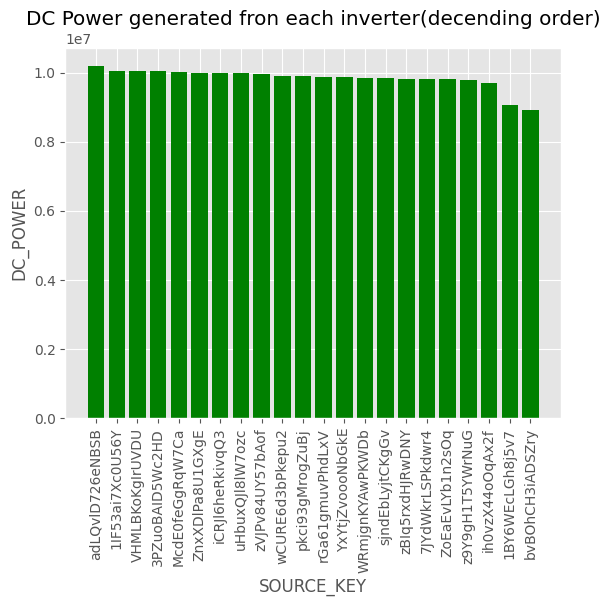

In [107]:
# Extracting data for the bar chart
x = inverter.index
y = inverter['DC_POWER']

# Creating a bar chart
plt.bar(x, y, color='green')


# Adding labels and a title
plt.xlabel('SOURCE_KEY')
plt.ylabel('DC_POWER')
plt.title('DC Power generated fron each inverter(decending order)')

plt.xticks(rotation=90)
# Show the plot
plt.show()

In [108]:
#resampleing dataset for 15min time intervals.
plant_15 = plant.resample('15min').sum()

In [109]:
#get time index
plant_15['time'] = plant_15.index.time

In [110]:
plant_15.head()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,time
DATE_TIME,,,,,,
2020-01-06 00:00:00,90970022,0.0,0.0,5407.25,153519480.0,00:00:00
2020-01-06 00:15:00,90970022,0.0,0.0,0.00,153519480.0,00:15:00
2020-01-06 00:30:00,90970022,0.0,0.0,0.00,153519480.0,00:30:00
2020-01-06 00:45:00,90970022,0.0,0.0,0.00,153519480.0,00:45:00
2020-01-06 01:00:00,90970022,0.0,0.0,0.00,153519480.0,01:00:00


In [113]:
weather['time'] = weather.index.time

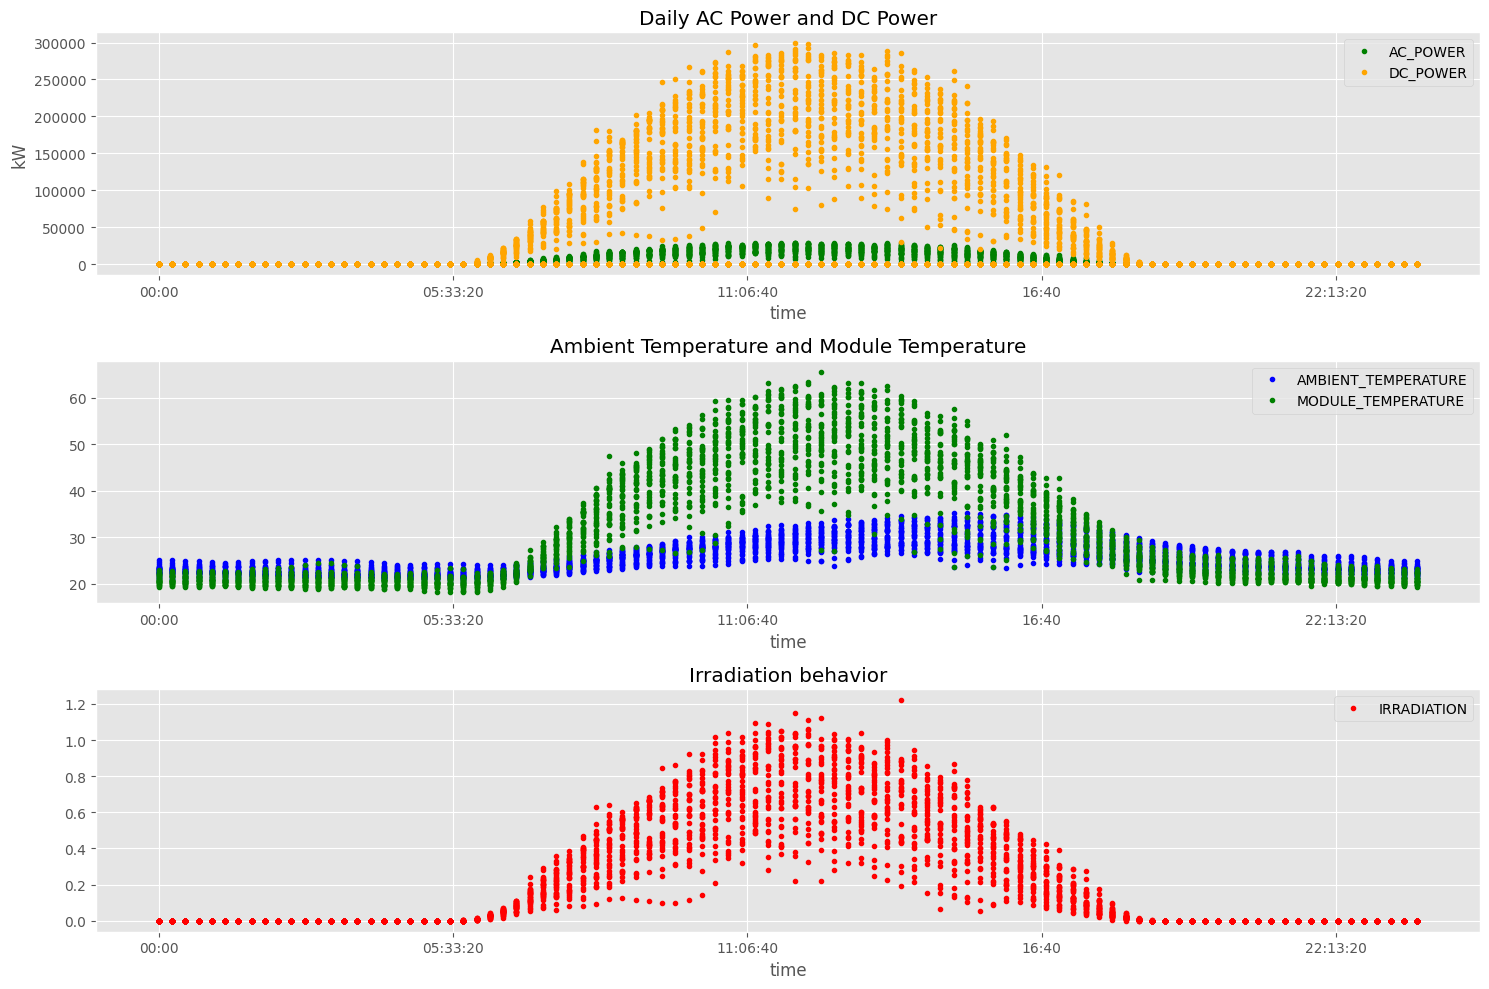

In [126]:
f, ax = plt.subplots(3, 1, figsize=(15, 10))

plant_15.plot(x='time', y='AC_POWER', style='.', color='green', ax=ax[0])
plant_15.plot(x='time', y='DC_POWER', style='.', color='orange', ax=ax[0])
weather.plot(x='time', y='AMBIENT_TEMPERATURE', style='.', color='blue', ax=ax[1])
weather.plot(x='time', y='MODULE_TEMPERATURE', style='.', color='green', ax=ax[1])
weather.plot(x='time', y='IRRADIATION', style='.', color='red', ax=ax[2])


ax[0].set_title('Daily AC Power and DC Power')
ax[1].set_title('Ambient Temperature and Module Temperature')
ax[2].set_title('Irradiation behavior')

ax[0].set_ylabel('kW')

plt.tight_layout()

plt.show()


<Axes: title={'center': 'Ambient Temperature and Module Temperature'}, xlabel='time'>

In [130]:
x = plant.index.date
x

array([datetime.date(2020, 5, 15), datetime.date(2020, 5, 15),
       datetime.date(2020, 5, 15), ..., datetime.date(2020, 6, 17),
       datetime.date(2020, 6, 17), datetime.date(2020, 6, 17)],
      dtype=object)

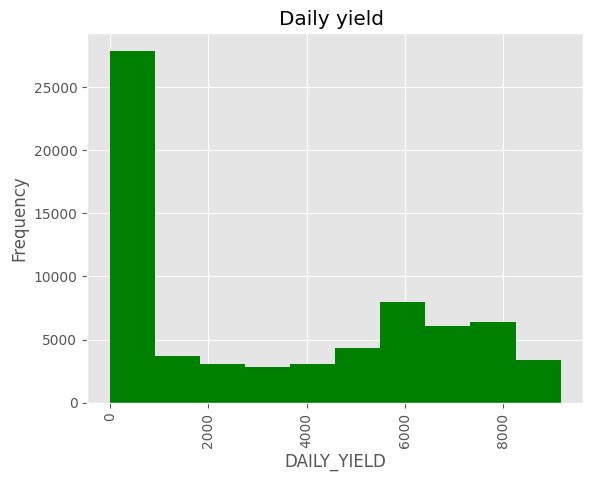

In [133]:
# Extracting data for the bar chart
x = plant.index.date
y = plant['DAILY_YIELD']

# Creating a histrogram chart
plt.hist(y, color='green')

# Adding labels and a title
plt.xlabel('DAILY_YIELD')
plt.ylabel('Frequency')
plt.title('Daily yield ')

plt.xticks(rotation=90)

# Show the plot
plt.show()


In [43]:
weather['time'] = weather.index.time

### Feature undestanding 

In [46]:
plant = pd.read_csv(r"/home/kasun/Documents/Working_folder/data/Plant_1_Generation_Data.csv")
plant = plant.set_index('DATE_TIME')
plant.index = pd.to_datetime(plant.index)

In [47]:
weather = pd.read_csv(r"/home/kasun/Documents/Working_folder/data/Plant_1_Weather_Sensor_Data.csv")
weather = weather.set_index('DATE_TIME')
weather.index = pd.to_datetime(weather.index)

In [48]:
weather.head()

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,
2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [179]:
# sample set from 2020-06-13 00:00:00 , 2020-06-16 00:00:00
X_train_weather = weather['2020-06-13 00:00:00':'2020-06-16 00:00:00'].drop('SOURCE_KEY',axis=1)

In [180]:
X_train_weather.head()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,time
DATE_TIME,,,,,
2020-06-13 00:00:00,4135001,21.771613,19.357530,0.0,00:00:00
2020-06-13 00:15:00,4135001,21.730046,19.504081,0.0,00:15:00
2020-06-13 00:30:00,4135001,21.687068,19.562803,0.0,00:30:00
2020-06-13 00:45:00,4135001,21.619232,19.559182,0.0,00:45:00
2020-06-13 01:00:00,4135001,21.625968,19.787058,0.0,01:00:00


In [192]:
train=plant['2020-06-13 00:00:00':'2020-06-16 00:00:00'].drop('SOURCE_KEY',axis=1).groupby('DATE_TIME').sum()
#test=plant['2020-06-16 00:00:00':'2020-06-16 23:45:00'].drop('SOURCE_KEY',axis=1).groupby('DATE_TIME').sum()

Autocorrelation check 

In [326]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train.DC_POWER)
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"{key}: {value}")

ADF Statistic: -3.8205709992796515
p-value: 0.002703721620386361
Critical Values:
1%: -3.45453261164607
5%: -2.8721859575020017
10%: -2.572442854861866


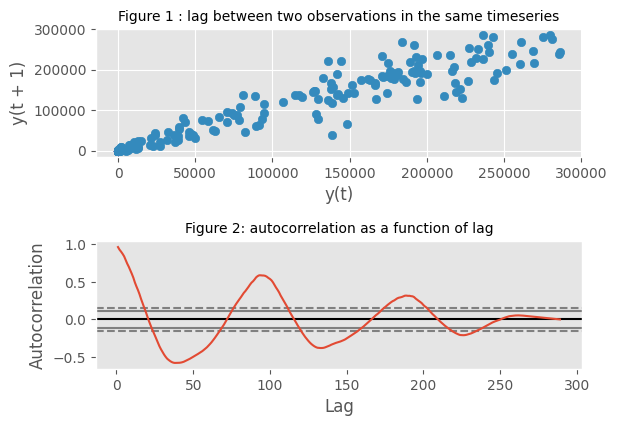

In [329]:
f,ax= plt.subplots(2,1)
plt.tight_layout(pad=4)
pd.plotting.lag_plot(train.DC_POWER, ax=ax[0])
pd.plotting.autocorrelation_plot(train.DC_POWER,ax=ax[1])
ax[0].set_title('Figure 1 : lag between two observations in the same timeseries', fontsize=10)
ax[1].set_title('Figure 2: autocorrelation as a function of lag',fontsize=10)

plt.show()

In [330]:
df_total = pd.merge(X_train_weather,train,on='DATE_TIME')

In [331]:
df_total['time'] = df_total.index.time

In [332]:
df_total.columns

Index(['PLANT_ID_x', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'time', 'PLANT_ID_y', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [197]:
## feature identification....

In [ ]:
#install pasty . uncomment when running 1st time
#!pip install --upgrade patsy

In [198]:
# only looking at DC power out put. drop other coloums
df_total=df_total[
            ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 
             #'PLANT_ID',
       'DC_POWER', 
             #'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'
             'time'
            ]].copy()

In [199]:
formula = "DC_POWER ~ time*(AMBIENT_TEMPERATURE + MODULE_TEMPERATURE+ IRRADIATION )"

In [362]:
y,X = dmatrices(formula, data = df_total,return_type='dataframe')

In [363]:
#,return_type='dataframe'

In [364]:
df_total['time'].count()

289

In [365]:
#### get X_train, X_test, y_train,y_test ####

In [366]:
# total count of X. set 20% to test 
df_total.shape

(289, 10)

In [367]:
X_train = X[:-50]
X_test = X.tail(50)

In [368]:
X_test.head()

,Intercept,"time[T.datetime.time(0, 15)]","time[T.datetime.time(0, 30)]","time[T.datetime.time(0, 45)]","time[T.datetime.time(1, 0)]","time[T.datetime.time(1, 15)]","time[T.datetime.time(1, 30)]","time[T.datetime.time(1, 45)]","time[T.datetime.time(2, 0)]","time[T.datetime.time(2, 15)]","time[T.datetime.time(2, 30)]","time[T.datetime.time(2, 45)]","time[T.datetime.time(3, 0)]","time[T.datetime.time(3, 15)]","time[T.datetime.time(3, 30)]","time[T.datetime.time(3, 45)]","time[T.datetime.time(4, 0)]","time[T.datetime.time(4, 15)]","time[T.datetime.time(4, 30)]","time[T.datetime.time(4, 45)]","time[T.datetime.time(5, 0)]","time[T.datetime.time(5, 15)]","time[T.datetime.time(5, 30)]","time[T.datetime.time(5, 45)]","time[T.datetime.time(6, 0)]","time[T.datetime.time(6, 15)]","time[T.datetime.time(6, 30)]","time[T.datetime.time(6, 45)]","time[T.datetime.time(7, 0)]","time[T.datetime.time(7, 15)]","time[T.datetime.time(7, 30)]","time[T.datetime.time(7, 45)]","time[T.datetime.time(8, 0)]","time[T.datetime.time(8, 15)]","time[T.datetime.time(8, 30)]","time[T.datetime.time(8, 45)]","time[T.datetime.time(9, 0)]","time[T.datetime.time(9, 15)]","time[T.datetime.time(9, 30)]","time[T.datetime.time(9, 45)]","time[T.datetime.time(10, 0)]","time[T.datetime.time(10, 15)]","time[T.datetime.time(10, 30)]","time[T.datetime.time(10, 45)]","time[T.datetime.time(11, 0)]","time[T.datetime.time(11, 15)]","time[T.datetime.time(11, 30)]","time[T.datetime.time(11, 45)]","time[T.datetime.time(12, 0)]","time[T.datetime.time(12, 15)]","time[T.datetime.time(12, 30)]","time[T.datetime.time(12, 45)]","time[T.datetime.time(13, 0)]","time[T.datetime.time(13, 15)]","time[T.datetime.time(13, 30)]","time[T.datetime.time(13, 45)]","time[T.datetime.time(14, 0)]","time[T.datetime.time(14, 15)]","time[T.datetime.time(14, 30)]","time[T.datetime.time(14, 45)]","time[T.datetime.time(15, 0)]","time[T.datetime.time(15, 15)]","time[T.datetime.time(15, 30)]","time[T.datetime.time(15, 45)]","time[T.datetime.time(16, 0)]","time[T.datetime.time(16, 15)]","time[T.datetime.time(16, 30)]","time[T.datetime.time(16, 45)]","time[T.datetime.time(17, 0)]","time[T.datetime.time(17, 15)]","time[T.datetime.time(17, 30)]","time[T.datetime.time(17, 45)]","time[T.datetime.time(18, 0)]","time[T.datetime.time(18, 15)]","time[T.datetime.time(18, 30)]","time[T.datetime.time(18, 45)]","time[T.datetime.time(19, 0)]","time[T.datetime.time(19, 15)]","time[T.datetime.time(19, 30)]","time[T.datetime.time(19, 45)]","time[T.datetime.time(20, 0)]","time[T.datetime.time(20, 15)]","time[T.datetime.time(20, 30)]","time[T.datetime.time(20, 45)]","time[T.datetime.time(21, 0)]","time[T.datetime.time(21, 15)]","time[T.datetime.time(21, 30)]","time[T.datetime.time(21, 45)]","time[T.datetime.time(22, 0)]","time[T.datetime.time(22, 15)]","time[T.datetime.time(22, 30)]","time[T.datetime.time(22, 45)]","time[T.datetime.time(23, 0)]","time[T.datetime.time(23, 15)]","time[T.datetime.time(23, 30)]","time[T.datetime.time(23, 45)]",AMBIENT_TEMPERATURE,"time[T.datetime.time(0, 15)]:AMBIENT_TEMPERATURE","time[T.datetime.time(0, 30)]:AMBIENT_TEMPERATURE","time[T.datetime.time(0, 45)]:AMBIENT_TEMPERATURE","time[T.datetime.time(1, 0)]:AMBIENT_TEMPERATURE","time[T.datetime.time(1, 15)]:AMBIENT_TEMPERATURE","time[T.datetime.time(1, 30)]:AMBIENT_TEMPERATURE","time[T.datetime.time(1, 45)]:AMBIENT_TEMPERATURE","time[T.datetime.time(2, 0)]:AMBIENT_TEMPERATURE","time[T.datetime.time(2, 15)]:AMBIENT_TEMPERATURE","time[T.datetime.time(2, 30)]:AMBIENT_TEMPERATURE","time[T.datetime.time(2, 45)]:AMBIENT_TEMPERATURE","time[T.datetime.time(3, 0)]:AMBIENT_TEMPERATURE","time[T.datetime.time(3, 15)]:AMBIENT_TEMPERATURE","time[T.datetime.time(3, 30)]:AMBIENT_TEMPERATURE","time[T.datetime.time(3, 45)]:AMBIENT_TEMPERATURE","time[T.datetime.time(4, 0)]:AMBIENT_TEMPERATURE","time[T.datetime.time(4, 15)]:AMBIENT_TEMPERATURE","time[T.datetime.time(4, 30)]:AMBIENT_TEMPERATURE","time[T.datetime.time(4, 45)]:AMBIENT_TEMPERATURE","time[T.datetime.time(5, 0

In [369]:
#X_train = df_total[:-50].drop(['DC_POWER','time'],axis=1)
#X_test = df_total.tail(50).drop(['DC_POWER','time'],axis=1)
#y_train = df_total

In [370]:
y_train = y[:-50]
y_test = y.tail(50)

In [371]:
y_train.shape

(239, 1)

In [372]:
y_train.head()

,DC_POWER
DATE_TIME,
2020-06-13 00:00:00,0.0
2020-06-13 00:15:00,0.0
2020-06-13 00:30:00,0.0
2020-06-13 00:45:00,0.0
2020-06-13 01:00:00,0.0


In [373]:
y.shape

(289, 1)

In [374]:
### model applying###
model = LinearRegression().fit(X_train, y_train)

In [375]:
#forcast
y_pred = model.predict( X_test)

In [376]:
y_predicted = pd.DataFrame(y_pred)


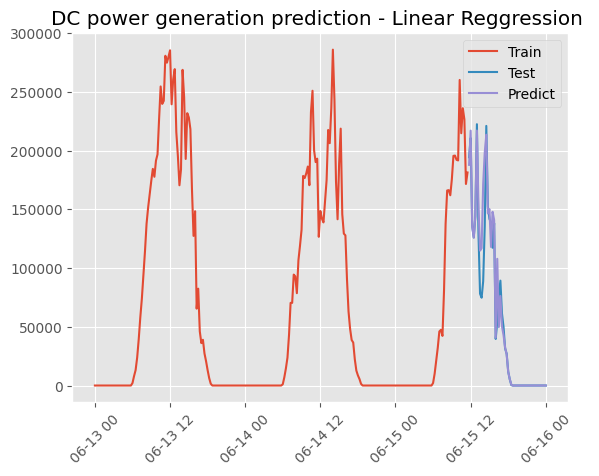

In [377]:
plt.plot(y_train, label='Train')
plt.plot(y_test,label='Test')
plt.plot(y_test.index,y_pred,label='Predict')


plt.xticks(rotation=45)
plt.title('DC power generation prediction - Linear Reggression ')
plt.legend()
plt.show()


In [216]:
y_train.head()

,DC_POWER
DATE_TIME,
2020-06-13 00:00:00,0.0
2020-06-13 00:15:00,0.0
2020-06-13 00:30:00,0.0
2020-06-13 00:45:00,0.0
2020-06-13 01:00:00,0.0


In [225]:
y_train.tail()

,DC_POWER
DATE_TIME,
2020-06-15 10:30:00,214895.714286
2020-06-15 10:45:00,236207.339273
2020-06-15 11:00:00,226633.285714
2020-06-15 11:15:00,171682.928570
2020-06-15 11:30:00,181471.607142


In [ ]:
#y_train datetime slot = '2020-06-13 00:00:00- 2020-06-15 11:30:00'

In [226]:
y_test.head()

,DC_POWER
DATE_TIME,
2020-06-15 11:45:00,194441.142851
2020-06-15 12:00:00,210791.678579
2020-06-15 12:15:00,135820.982142
2020-06-15 12:30:00,126140.107142
2020-06-15 12:45:00,144113.285714


In [227]:
y_test.tail()

,DC_POWER
DATE_TIME,
2020-06-15 23:00:00,0.0
2020-06-15 23:15:00,0.0
2020-06-15 23:30:00,0.0
2020-06-15 23:45:00,0.0
2020-06-16 00:00:00,0.0


In [ ]:
# y_test datetime slot = '2020-06-15 11:45:00 - 2020-06-16 00:00:00'

In [217]:
y_predicted.head()

,0
0,187971.990294
1,217096.526613
2,135185.720971
3,125994.927282
4,144932.597001


In [218]:
mse = mean_squared_error(y_test,y_predicted)
print("Mean Squared Error:", mse)

Mean Squared Error: 399558937.0940668


In [219]:
r2 = r2_score(y_test, y_predicted)
print("R-squared Score:", r2)

R-squared Score: 0.9183518931890167


In [220]:
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
print("RMSE Score:", rmse)

RMSE Score: 19988.970386042067


### applying forecasting framework - Prophet

In [222]:
#installing Prophet. uncomment when running 1st time
#pip install prophet

In [221]:
from prophet import Prophet

In [228]:
#prepare training dataset for Prophet - time slot of linear model is 2020-06-13 00:00:00- 2020-06-15 11:30:00
Pp_train =plant['2020-06-13 00:00:00':'2020-06-15 11:30:00'].drop('SOURCE_KEY',axis=1).groupby('DATE_TIME').sum().reset_index()

In [298]:
#prepare test dataset for Prophet-time slot of linear model is  2020-06-15 11:45:00 - 2020-06-16 00:00:00'
Pp_test=plant['2020-06-15 11:45:00':'2020-06-16 00:00:00'].drop('SOURCE_KEY',axis=1).DC_POWER.groupby('DATE_TIME').sum()

In [302]:
Pp_train.columns

Index(['ds', 'y'], dtype='object')

In [311]:
remane = ['ds','y']
Pp_train.columns = remane


In [313]:
model = Prophet()

In [314]:
model.fit(Pp_train)

03:09:14 - cmdstanpy - INFO - Chain [1] start processing
03:09:14 - cmdstanpy - INFO - Chain [1] done processing


In [306]:
Pp_test.head()

DATE_TIME
2020-06-15 11:45:00    194441.142851
2020-06-15 12:00:00    210791.678579
2020-06-15 12:15:00    135820.982142
2020-06-15 12:30:00    126140.107142
2020-06-15 12:45:00    144113.285714
Name: DC_POWER, dtype: float64

In [307]:
test_dates=pd.DataFrame(Pp_test.index).rename(columns={'DATE_TIME':'ds'})
forecast_prophet=model.predict(test_dates)

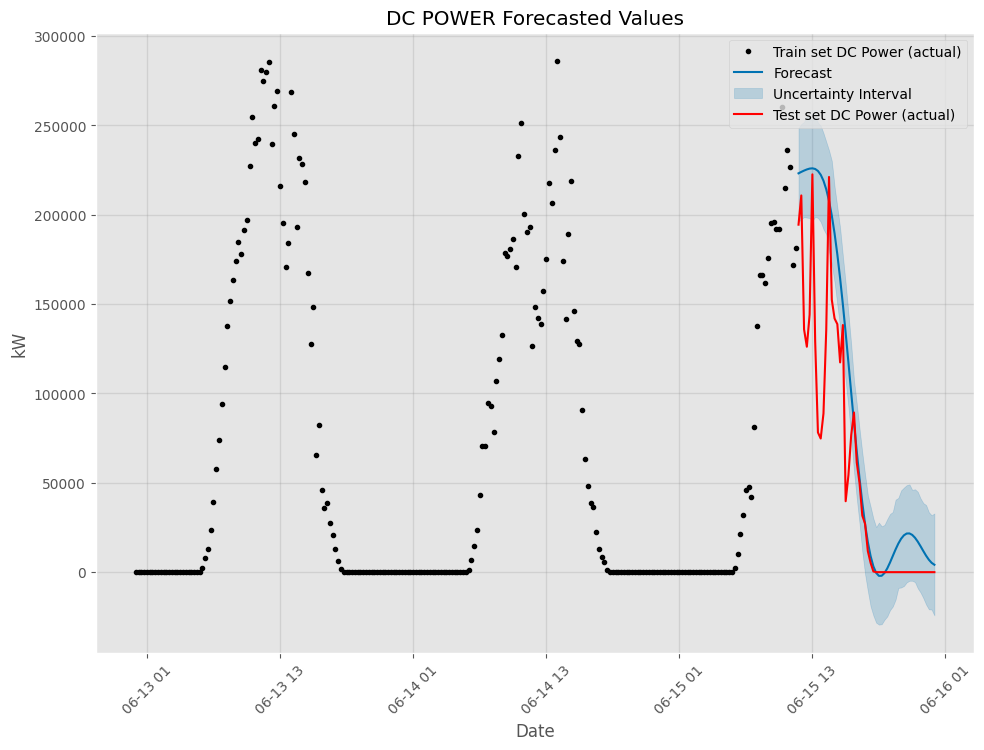

In [315]:
plt.figure(figsize=(10,7))
fig1=model.plot(forecast_prophet,ax=plt.gca())
fig2=plt.plot(Pp_test,'r-', label='Actual from test set')

handles1, labels1 = fig1.gca().get_legend_handles_labels()
handles=handles1[0:3]+fig2
labels1 =['Train set DC Power (actual)', 'Forecast', 'Uncertainty Interval','Test set DC Power (actual)']

fig1.gca().legend(handles, labels1,loc='upper right')
plt.xlabel('Date')
plt.ylabel('kW')
plt.title('DC POWER Forecasted Values')
plt.xticks(rotation=45)
plt.show()



In [321]:
y_prophet=forecast_prophet.set_index('ds').yhat
test_pr=pd.DataFrame(Pp_test)

In [322]:
print('Prophet R2 Score: %f' % (r2_score(y_prophet,test_pr)))

Prophet R2 Score: 0.696791


In [323]:
print('Prophet MAE Score: %f' % (mean_absolute_error(y_prophet,test_pr)))

Prophet MAE Score: 31513.159465


In [324]:
print('Prophet RMSE Score: %f' % (mean_squared_error(y_prophet,test_pr,squared=False)))

Prophet RMSE Score: 50390.243834


In [83]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached prophet-1.1.4-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached cmdstanpy-1.1.0-py3-none-any.whl (83 kB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Using cached holidays-0.25-py3-none-any.whl (514 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached pandas-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached korean_lunar_calendar-0.3.1-py3-none-any.whl (9.0 kB)
  Using cached ephem-4.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Consider adding this directory to PATH 